/var/folders/jh/_03qbqf130l8hjh8rpc6f4_c0000gn/T/ipykernel_6505/3404529780.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


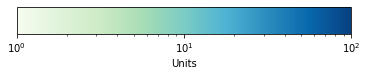

In [213]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

GnBu = mpl.cm.GnBu
logscale = mpl.colors.LogNorm(vmin=1, vmax=100)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=GnBu,
                                norm=logscale,
                                orientation='horizontal')
cb1.set_label('Units')
fig.show()

In [407]:
from matplotlib.colors import to_hex, to_rgba
import json
import urllib


numvalues = 20
maxv = 1
cmap = mpl.cm.GnBu
interval_stops = np.linspace(0, 1, numvalues)
colormap = cmap(interval_stops)
hexcmap = np.multiply([to_rgba(c) for c in colormap], 255)

colormap = []
for idx in range(len(interval_stops)):
    if idx < len(interval_stops)-1:
        interval = (interval_stops[idx], interval_stops[idx+1])
        rgba_color = tuple(map(int, hexcmap[idx]))
        colormap.append((interval, rgba_color))

colormap.append(((1.0, 1000), tuple(map(int, hexcmap[-1]))))

cmap_params = urllib.parse.urlencode({
    "colormap": json.dumps(colormap)
})

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [411]:
file = 's3://climatedashboard-data/GPM_3IMERGHHE/3B-HHR-E.MS.MRG.3IMERG.20210101-S000000-E002959.0000.V06B.tif'
url = f'https://staging-raster.delta-backend.com/cog/preview?url={file}&nodata=0&'
print('Option using expression log(b1):')
print(f'{url}expression=log(b1)&colormap_name=gnbu&rescale=0,1')
print('\nOption using custom colormap:')
print(f'{url}{cmap_params}')

Option using expression log(b1):
https://staging-raster.delta-backend.com/cog/preview?url=s3://climatedashboard-data/GPM_3IMERGHHE/3B-HHR-E.MS.MRG.3IMERG.20210101-S000000-E002959.0000.V06B.tif&nodata=0&expression=log(b1)&colormap_name=gnbu&rescale=0,1

Option using custom colormap:
https://staging-raster.delta-backend.com/cog/preview?url=s3://climatedashboard-data/GPM_3IMERGHHE/3B-HHR-E.MS.MRG.3IMERG.20210101-S000000-E002959.0000.V06B.tif&nodata=0&colormap=%5B%5B%5B0.0%2C+0.05263157894736842%5D%2C+%5B247%2C+252%2C+240%2C+255%5D%5D%2C+%5B%5B0.05263157894736842%2C+0.10526315789473684%5D%2C+%5B237%2C+248%2C+231%2C+255%5D%5D%2C+%5B%5B0.10526315789473684%2C+0.15789473684210525%5D%2C+%5B228%2C+244%2C+222%2C+255%5D%5D%2C+%5B%5B0.15789473684210525%2C+0.21052631578947367%5D%2C+%5B218%2C+240%2C+213%2C+255%5D%5D%2C+%5B%5B0.21052631578947367%2C+0.2631578947368421%5D%2C+%5B210%2C+237%2C+204%2C+255%5D%5D%2C+%5B%5B0.2631578947368421%2C+0.3157894736842105%5D%2C+%5B200%2C+233%2C+195%2C+255%5D%5D%2C+%5B